In [2]:
from typing import List, Tuple, Dict, Optional
import numpy as np
import matplotlib.pyplot as plt

from aircraft_design.components.fuselage.fuselage_geometry import FuselageGeometry, CrossSection, CrossSectionShape
from aircraft_design.components.aerodynamics.basic_aero import AerodynamicComponent
from aircraft_design.components.interior.blended_wing_cabin import SingleFloorCabin, EconomyBlock, Galley, Bathroom
from aircraft_design.core.plotting import Object3D, plot_orthographic_views, plot_cross_section
# Import additional required modules
from aircraft_design.components.aerodynamics.wing_geometry import WaypointWingGeometry, TailGeometry, SimpleSweptWing
from aircraft_design.core.base import Position
from aircraft_design.core.plotting import plot_3d_shape

In [3]:
economy_seat_width = 1.5
economy_aisle_width = 3
fuselage_wall_width = 1

cargo_height = 8
floor_spacing = 1
ceiling_height = 7

economy_row_length = 34 / 12.
emergency_row_length = 5
large_galley_length = 20
small_galley_length = 10
length_of_bunks = 10

In [4]:
tall_fuselage_length = 50
transition_length = 70
short_fuselage_length = tall_fuselage_length + transition_length + 100

tall_fuselage_height = 35
short_fuselage_height = 27

fuselage_width = 27

In [5]:
nose_length = 20
tail_length = 50
tail_height = 18

waypoints = [ #x, width, height, z_offset
    (0, 5, 5, tall_fuselage_height/2), # nose tip
    (nose_length, fuselage_width, tall_fuselage_height, tall_fuselage_height/2), # Nose-> tall fuselage
    (nose_length + tall_fuselage_length, fuselage_width, tall_fuselage_height, tall_fuselage_height/2), # tall fuselage start
    (nose_length + short_fuselage_length, fuselage_width, short_fuselage_height, short_fuselage_height/2), # short fuselage start
    (nose_length + tall_fuselage_length + transition_length, fuselage_width, short_fuselage_height, short_fuselage_height/2), # short fuselage start
    (nose_length + short_fuselage_length + tail_length, fuselage_width/4, tail_height, short_fuselage_height - tail_height/2), # short fuselage end
]
print(waypoints)

[(0, 5, 5, 17.5), (20, 27, 35, 17.5), (70, 27, 35, 17.5), (240, 27, 27, 13.5), (140, 27, 27, 13.5), (290, 6.75, 18, 18.0)]


In [6]:
fuselage = AerodynamicComponent("fuselage")

fuselage_geom = FuselageGeometry()

for x, width, height, z_offset in waypoints:
    section = CrossSection(
        station=x,
        width=width,
        height=height,
        shape=CrossSectionShape.SUPER_ELLIPSE,
        z_offset=z_offset,
        parameters={'n': 2.5}  # Super-ellipse parameter for smooth blending
    )
    fuselage_geom.add_section(section)

fuselage.geometry = fuselage_geom

Total cabin length: 189.1 ft
Total seats: 660


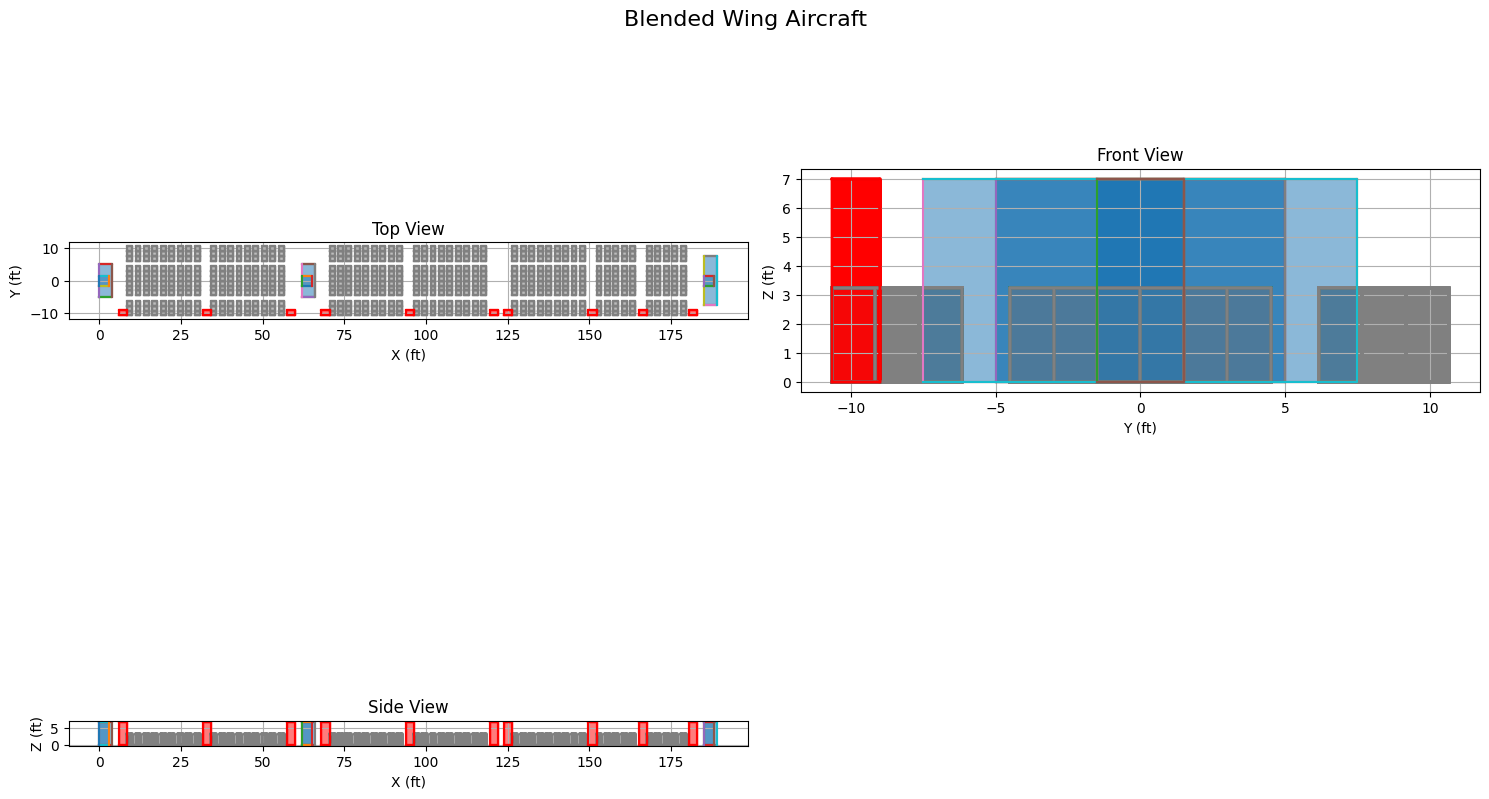

In [6]:
# Define cabin parameters
economy_seat_width = 1.5
economy_aisle_width = 3
fuselage_wall_width = 1
ceiling_height = 7

# Create a single floor cabin with 3-6-3 configuration
cabin = SingleFloorCabin("first_floor_cabin")

# Create economy blocks for a 600-passenger aircraft
# We'll create three economy blocks with 3-6-3 configuration
# Assuming about 200 passengers per block
max_rows_per_section = int(110/12)
# Front economy block
front_economy = EconomyBlock(
    name="front_economy",
    seat_groups=[3, 6, 3],  # 3-6-3 configuration
    rows_per_section=[max_rows_per_section,max_rows_per_section],  # 20 rows total
    seats_per_exit=55
)

# Middle economy block
middle_economy = EconomyBlock(
    name="middle_economy",
    seat_groups=[3, 6, 3],  # 3-6-3 configuration
    rows_per_section=[max_rows_per_section, max_rows_per_section],  # 30 rows total
    seats_per_exit=55
)

# Rear economy block
rear_economy = EconomyBlock(
    name="rear_economy",
    seat_groups=[3, 6, 3],  # 3-6-3 configuration
    rows_per_section=[max_rows_per_section, 5,5],  # 20 rows total
    seats_per_exit=55
)

# Create galleys and bathrooms
GALLEY_SPACING = 2.0
front_galley = Galley("front_galley", width=10.0, depth=4.0, height=7.0)
mid_galley = Galley("mid_galley", width=10.0, depth=4.0, height=7.0)
rear_galley = Galley("rear_galley", width=15.0, depth=4.0, height=7.0)

bathroom_width = 3.0
bathroom_depth = 3.0
front_bathroom = Bathroom("front_bathroom", width=bathroom_width, depth=bathroom_depth)
mid_bathroom = Bathroom("mid_bathroom", width=bathroom_width, depth=bathroom_depth)
rear_bathroom = Bathroom("rear_bathroom", width=bathroom_width, depth=bathroom_depth)

# Add components to cabin in sequence
current_x = 0.0

# Add front galley and bathroom
cabin.add_component(front_galley, current_x)
cabin.add_component(front_bathroom, current_x)
current_x += front_galley.geometry.parameters['depth'] + GALLEY_SPACING

# Add front economy block
cabin.add_component(front_economy, current_x)
current_x += front_economy.total_length + GALLEY_SPACING

# Add mid galley and bathroom
cabin.add_component(mid_galley, current_x)
cabin.add_component(mid_bathroom, current_x)
current_x += mid_galley.geometry.parameters['depth'] + GALLEY_SPACING

# Add middle economy block
cabin.add_component(middle_economy, current_x)
current_x += middle_economy.total_length + GALLEY_SPACING

# Add rear economy block
cabin.add_component(rear_economy, current_x)
current_x += rear_economy.total_length + GALLEY_SPACING

# Add rear galley and bathroom
cabin.add_component(rear_galley, current_x)
cabin.add_component(rear_bathroom, current_x)

# Calculate total cabin length
total_cabin_length = current_x + rear_galley.geometry.parameters['depth']

print(f"Total cabin length: {total_cabin_length:.1f} ft")
print(f"Total seats: {front_economy.num_seats + middle_economy.num_seats + rear_economy.num_seats}")
# Plot the fuselage
obj = cabin.plot()
fig = plt.figure(figsize=(15, 10))
fig, (ax_top, ax_side, ax_front) = plot_orthographic_views(obj, fig=fig)
plt.suptitle('Blended Wing Aircraft', fontsize=16)
plt.tight_layout()

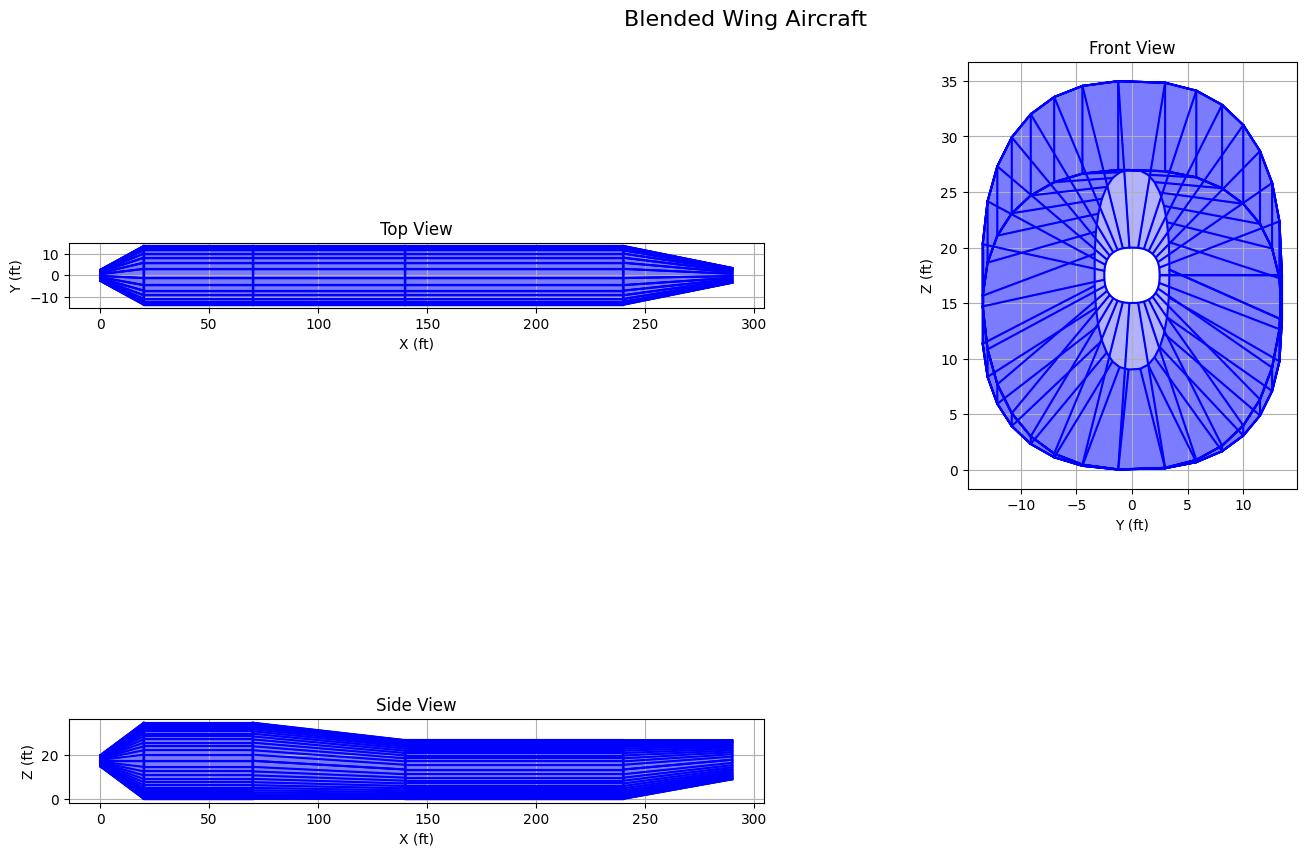

In [7]:
# Plot the fuselage
obj = fuselage.plot()
fig = plt.figure(figsize=(15, 10))
fig, (ax_top, ax_side, ax_front) = plot_orthographic_views(obj, fig=fig)
plt.suptitle('Blended Wing Aircraft', fontsize=16)
plt.tight_layout()

In [12]:
# Create a main wing using WaypointWingGeometry
main_wing = AerodynamicComponent("main_wing")
wing_geom = WaypointWingGeometry()

# Set wing parameters
wing_geom.parameters.update({
    'span': 315.0,  # Wing span in feet
    'le_sweep': 40.0,  # Leading edge sweep in degrees
    'dihedral': 5.0,  # Dihedral angle in degrees
})

root_chord = 49.53
tip_chord = 9.91
mean_chord = 34.12
y_bar =	88.2
thickness_ratio = 0.14

# Add waypoints from root to tip
wing_geom.add_waypoint(0.0, root_chord, thickness_ratio * root_chord)    # Root: 30ft chord, 4.5ft thickness
wing_geom.add_waypoint(1.0, tip_chord, thickness_ratio * tip_chord)    # Tip

# Set wing position - attach to the fuselage
wing_position = Position(
    x=nose_length + tall_fuselage_length/2,  # Position wing in the middle of the tall fuselage section#
    y=0,
    z=tall_fuselage_height/2  # Align with the middle of the fuselage
)
wing_geom.position = wing_position
main_wing.geometry = wing_geom

# print aspect ratio
print(f"Aspect ratio: {main_wing.geometry.aspect_ratio:.2f}")

Aspect ratio: 10.60


In [9]:
# Create horizontal tail
h_tail = AerodynamicComponent("horizontal_tail")
h_tail_span = 94.64
h_tail_root_chord = 32.64
h_tail_tip_chord = 14.69
h_tail_sweep = 44
h_tail_dihedral = 0.0

h_tail_geom = SimpleSweptWing(h_tail_root_chord, h_tail_tip_chord, h_tail_span, h_tail_sweep, h_tail_dihedral)
h_tail_geom.position = Position(
    x=nose_length + short_fuselage_length + tail_length - 30,  # Near the tail
    y=0,
    z=short_fuselage_height - 5  # Slightly below the top of the fuselage
)
h_tail.geometry = h_tail_geom

In [10]:
# Create vertical tail
v_tail = AerodynamicComponent("vertical_tail")
v_tail_geom = TailGeometry()

# Set vertical tail parameters
v_tail_geom.parameters.update({
    'height': 55.41,  # Vertical tail height
    'root_chord': 46.32,  # Root chord length
    'tip_chord': 20.84,  # Tip chord length
    'sweep': 40.0,  # Sweep angle
    'cant_angle': 0.0,  # No cant (vertical)
    'thickness_ratio': 0.12  # Thickness ratio
})

# Position the vertical tail
v_tail_position = Position(
    x=nose_length + short_fuselage_length + tail_length - 35,  # Near the tail
    y=0,
    z=short_fuselage_height  # At the top of the fuselage
)
v_tail_geom.position = v_tail_position
v_tail.geometry = v_tail_geom


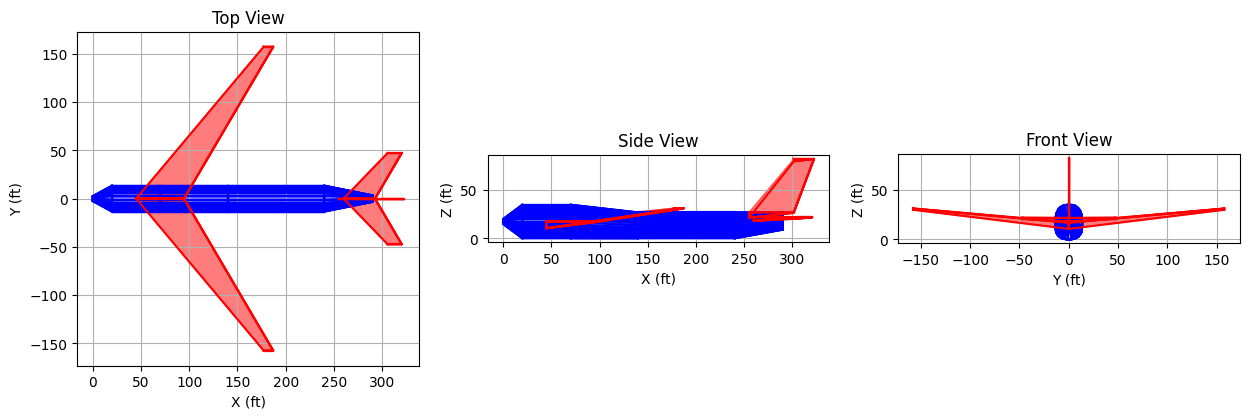

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [13]:
main_wing.color = 'red'
h_tail.color = 'red'
v_tail.color = 'red'
# Create 3D objects for visualization
# Instead of creating objects directly from geometry, use the component's plot method
fuselage_obj = fuselage.plot()
main_wing_obj = main_wing.plot()
h_tail_obj = h_tail.plot()
v_tail_obj = v_tail.plot()

# Plot orthographic views of the complete aircraft
fig = plt.figure(figsize=(15, 10))
ax_top = fig.add_subplot(131)
ax_side = fig.add_subplot(132)
ax_front = fig.add_subplot(133)

# Plot fuselage
plot_orthographic_views(fuselage_obj, axes=[ax_top, ax_side, ax_front])
# Plot wing
plot_orthographic_views(main_wing_obj, axes=[ax_top, ax_side, ax_front])
# Plot horizontal tail
plot_orthographic_views(h_tail_obj, axes=[ax_top, ax_side, ax_front])
# Plot vertical tail
plot_orthographic_views(v_tail_obj, axes=[ax_top, ax_side, ax_front])

ax_top.set_title("Top View")
ax_side.set_title("Side View")
ax_front.set_title("Front View")
plt.suptitle("Aircraft Orthographic Views", fontsize=16)
plt.tight_layout()
plt.show()

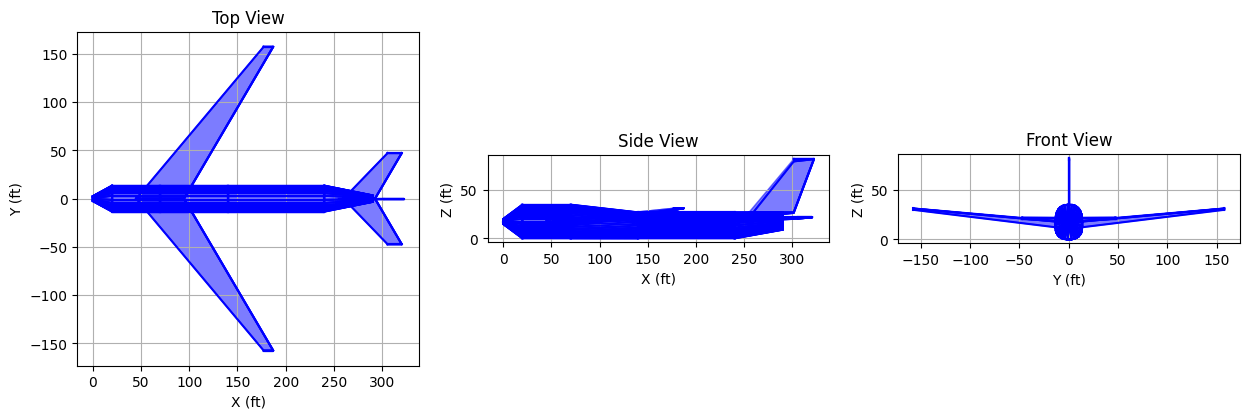

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [12]:

# Create 3D objects for visualization
wing_obj = main_wing.geometry.create_object()
h_tail_obj = h_tail.geometry.create_object()
v_tail_obj = v_tail.geometry.create_object()

fuselage_obj = fuselage.geometry.create_object()

# Plot orthographic views of the complete aircraft
fig = plt.figure(figsize=(15, 10))
ax_top = fig.add_subplot(131)
ax_side = fig.add_subplot(132)
ax_front = fig.add_subplot(133)

# Plot fuselage
plot_orthographic_views(fuselage_obj, axes=[ax_top, ax_side, ax_front])
# Plot wing
fig, (ax_top, ax_side, ax_front) = plot_orthographic_views(wing_obj, axes=[ax_top, ax_side, ax_front])
# Plot horizontal tail
plot_orthographic_views(h_tail_obj, axes=[ax_top, ax_side, ax_front])
# Plot vertical tail
plot_orthographic_views(v_tail_obj, axes=[ax_top, ax_side, ax_front])

ax_top.set_title("Top View")
ax_side.set_title("Side View")
ax_front.set_title("Front View")
plt.suptitle("Aircraft Orthographic Views", fontsize=16)
plt.tight_layout()
plt.show()